In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sys, os
sys.path.append(os.path.abspath(os.path.join('../scripts')))
from data_preprocess import data_preprocess

In [21]:
train_df = pd.read_csv('../data/train.csv')
test_df = pd.read_csv('../data/test.csv')
store_df = pd.read_csv('../data/store.csv')

C:\Users\mikyg\AppData\Local\Temp\ipykernel_5176\1084274210.py:1: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  train_df = pd.read_csv('../data/train.csv')


In [22]:
preprocessor = data_preprocess()

In [23]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 9 columns):
 #   Column         Non-Null Count    Dtype 
---  ------         --------------    ----- 
 0   Store          1017209 non-null  int64 
 1   DayOfWeek      1017209 non-null  int64 
 2   Date           1017209 non-null  object
 3   Sales          1017209 non-null  int64 
 4   Customers      1017209 non-null  int64 
 5   Open           1017209 non-null  int64 
 6   Promo          1017209 non-null  int64 
 7   StateHoliday   1017209 non-null  object
 8   SchoolHoliday  1017209 non-null  int64 
dtypes: int64(7), object(2)
memory usage: 69.8+ MB


In [24]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41088 entries, 0 to 41087
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             41088 non-null  int64  
 1   Store          41088 non-null  int64  
 2   DayOfWeek      41088 non-null  int64  
 3   Date           41088 non-null  object 
 4   Open           41077 non-null  float64
 5   Promo          41088 non-null  int64  
 6   StateHoliday   41088 non-null  object 
 7   SchoolHoliday  41088 non-null  int64  
dtypes: float64(1), int64(5), object(2)
memory usage: 2.5+ MB


In [25]:
store_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1115 entries, 0 to 1114
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Store                      1115 non-null   int64  
 1   StoreType                  1115 non-null   object 
 2   Assortment                 1115 non-null   object 
 3   CompetitionDistance        1112 non-null   float64
 4   CompetitionOpenSinceMonth  761 non-null    float64
 5   CompetitionOpenSinceYear   761 non-null    float64
 6   Promo2                     1115 non-null   int64  
 7   Promo2SinceWeek            571 non-null    float64
 8   Promo2SinceYear            571 non-null    float64
 9   PromoInterval              571 non-null    object 
dtypes: float64(5), int64(2), object(3)
memory usage: 87.2+ KB


In [26]:
train_store = pd.merge(train_df, store_df, how = 'inner', on = 'Store')
test_store = pd.merge(test_df, store_df, how = 'inner', on = 'Store')

In [27]:
train_store = preprocessor.convert_to_datetime(train_store, 'Date')
test_store = preprocessor.convert_to_datetime(test_store, 'Date')

In [28]:
train_store = preprocessor.extract_fields_date(train_store, 'Date')
test_store = preprocessor.extract_fields_date(test_store, 'Date')

c:\Users\mikyg\OneDrive\Desktop\10 Acadamy\Week 3\Pharmaceutical-Sales-Prediction_Rossmann\scripts\data_preprocess.py:80: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated. Please use Series.dt.isocalendar().week instead.
  df['weekofyear'] = df[date_column].dt.weekofyear
c:\Users\mikyg\OneDrive\Desktop\10 Acadamy\Week 3\Pharmaceutical-Sales-Prediction_Rossmann\scripts\data_preprocess.py:80: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated. Please use Series.dt.isocalendar().week instead.
  df['weekofyear'] = df[date_column].dt.weekofyear


In [29]:
# SINCE WE ARE WORKING ON A TIME SERIES DATA WE MUST USE DATE AS AN INDEX
train_store.set_index('Date', inplace=True)
test_store.set_index('Date', inplace=True)

In [30]:
train_store.to_csv('../data/train_complete.csv', index=True)
test_store.to_csv('../data/test_complete.csv', index=True)

In [ ]:
train_store = pd.read_csv('../data/train_complete.csv')
test_store = pd.read_csv('../data/test_complete')

In [32]:
# Overview of the data frames
train_store.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1017209 entries, 2015-07-31 to 2013-01-01
Data columns (total 23 columns):
 #   Column                     Non-Null Count    Dtype  
---  ------                     --------------    -----  
 0   Store                      1017209 non-null  int64  
 1   DayOfWeek                  1017209 non-null  int64  
 2   Sales                      1017209 non-null  int64  
 3   Customers                  1017209 non-null  int64  
 4   Open                       1017209 non-null  int64  
 5   Promo                      1017209 non-null  int64  
 6   StateHoliday               1017209 non-null  object 
 7   SchoolHoliday              1017209 non-null  int64  
 8   StoreType                  1017209 non-null  object 
 9   Assortment                 1017209 non-null  object 
 10  CompetitionDistance        1014567 non-null  float64
 11  CompetitionOpenSinceMonth  693861 non-null   float64
 12  CompetitionOpenSinceYear   693861 non-null   float64
 1

In [33]:
test_store.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 41088 entries, 2015-09-17 to 2015-08-01
Data columns (total 22 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Id                         41088 non-null  int64  
 1   Store                      41088 non-null  int64  
 2   DayOfWeek                  41088 non-null  int64  
 3   Open                       41077 non-null  float64
 4   Promo                      41088 non-null  int64  
 5   StateHoliday               41088 non-null  object 
 6   SchoolHoliday              41088 non-null  int64  
 7   StoreType                  41088 non-null  object 
 8   Assortment                 41088 non-null  object 
 9   CompetitionDistance        40992 non-null  float64
 10  CompetitionOpenSinceMonth  25872 non-null  float64
 11  CompetitionOpenSinceYear   25872 non-null  float64
 12  Promo2                     41088 non-null  int64  
 13  Promo2SinceWeek            23

In [34]:
train_store.describe()

,Store,DayOfWeek,Sales,Customers,Open,Promo,SchoolHoliday,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,Year,Month,Day,weekday,weekofyear,weekend
count,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.014567e+06,693861.000000,693861.000000,1.017209e+06,509178.000000,509178.000000,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06
mean,5.584297e+02,2.998341e+00,5.773819e+03,6.331459e+02,8.301067e-01,3.815145e-01,1.786467e-01,5.430086e+03,7.222866,2008.690228,5.005638e-01,23.269093,2011.752774,2.013832e+03,5.846762e+00,1.570279e+01,2.998341e+00,2.361551e+01,4.268444e-01
std,3.219087e+02,1.997391e+00,3.849926e+03,4.644117e+02,3.755392e-01,4.857586e-01,3.830564e-01,7.715324e+03,3.211832,5.992644,4.999999e-01,14.095973,1.662870,7.773960e-01,3.326097e+00,8.787638e+00,1.997391e+00,1.443338e+01,4.946196e-01
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.000000e+01,1.000000,1900.000000,0.000000e+00,1.000000,2009.000000,2.013000e+03,1.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00
25%,2.800000e+02,1.000000e+00,3.727000e+03,4.050000e+02,1.000000e+00,0.000000e+00,0.000000e+00,7.100000e+02,4.000000,2006.000000,0.000000e+00,13.000000,2011.000000,2.013000e+03,3.000000e+00,8.000000e+00,1.000000e+00,1.100000e+01,0.000000e+00
50%,5.580000e+02,3.000000e+00,5.744000e+03,6.090000e+02,1.000000e+00,0.000000e+00,0.000000e+00,2.330000e+03,8.000000,2010.000000,1.000000e+00,22.000000,2012.000000,2.014000e+03,6.000000e+00,1.600000e+01,3.000000e+00,2.200000e+01,0.000000e+00
75%,8.380000e+02,5.000000e+00,7.856000e+03,8.370000e+02,1.000000e+00,1.000000e+00,0.000000e+00,6.890000e+03,10.000000,2013.000000,1.000000e+00,37.000000,2013.000000,2.014000e+03,8.000000e+00,2.300000e+01,5.000000e+00,3.500000e+01,1.000000e+00
max,1.115000e+03,6.000000e+00,4.155100e+04,7.388000e+03,1.000000e+00,1.000000e+00,1.000000e+00,7.586000e+04,12.000000,2015.000000,1.000000e+00,50.000000,2015.000000,2.015000e+03,1.200000e+01,3.100000e+01,6.000000e+00,5.200000e+01,1.000000e+00


In [35]:
test_store.describe()

,Id,Store,DayOfWeek,Open,Promo,SchoolHoliday,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,Year,Month,Day,weekday,weekofyear,weekend
count,41088.000000,41088.000000,41088.000000,41077.000000,41088.000000,41088.000000,40992.000000,25872.000000,25872.000000,41088.000000,23856.000000,23856.000000,41088.0,41088.000000,41088.000000,41088.000000,41088.000000,41088.000000
mean,20544.500000,555.899533,2.979167,0.854322,0.395833,0.443487,5088.583138,7.035250,2008.641929,0.580607,24.426559,2011.820926,2015.0,8.354167,13.520833,2.979167,34.645833,0.437500
std,11861.228267,320.274496,2.015481,0.352787,0.489035,0.496802,7225.487467,3.143015,6.862400,0.493466,14.161312,1.692166,0.0,0.478266,8.448450,2.015481,2.015481,0.496084
min,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,20.000000,1.000000,1900.000000,0.000000,1.000000,2009.000000,2015.0,8.000000,1.000000,0.000000,31.000000,0.000000
25%,10272.750000,279.750000,1.000000,1.000000,0.000000,0.000000,720.000000,4.000000,2006.000000,0.000000,13.000000,2011.000000,2015.0,8.000000,6.750000,1.000000,33.000000,0.000000
50%,20544.500000,553.500000,3.000000,1.000000,0.000000,0.000000,2425.000000,7.000000,2010.000000,1.000000,22.000000,2012.000000,2015.0,8.000000,12.500000,3.000000,35.000000,0.000000
75%,30816.250000,832.250000,5.000000,1.000000,1.000000,1.000000,6480.000000,9.000000,2012.000000,1.000000,37.000000,2013.000000,2015.0,9.000000,19.250000,5.000000,36.000000,1.000000
max,41088.000000,1115.000000,6.000000,1.000000,1.000000,1.000000,75860.000000,12.000000,2015.000000,1.000000,49.000000,2015.000000,2015.0,9.000000,31.000000,6.000000,38.000000,1.000000


In [36]:
preprocessor.get_missing_data_percentage(train_store)

,Total,%
PromoInterval,508031,49.9
Promo2SinceYear,508031,49.9
Promo2SinceWeek,508031,49.9
CompetitionOpenSinceMonth,323348,31.8
CompetitionOpenSinceYear,323348,31.8
CompetitionDistance,2642,0.3
weekofyear,0,0.0
weekday,0,0.0
Day,0,0.0
Month,0,0.0


In [37]:
preprocessor.get_missing_data_percentage(test_store)

,Total,%
Promo2SinceWeek,17232,41.9
PromoInterval,17232,41.9
Promo2SinceYear,17232,41.9
CompetitionOpenSinceYear,15216,37.0
CompetitionOpenSinceMonth,15216,37.0
CompetitionDistance,96,0.2
Open,11,0.0
weekofyear,0,0.0
weekday,0,0.0
Day,0,0.0


In [39]:
missing_df = train_store[['PromoInterval', 'Promo2SinceYear', 'Promo2SinceWeek', 'CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear', 'CompetitionDistance', 'Open']]
missing_df.head(10)

,PromoInterval,Promo2SinceYear,Promo2SinceWeek,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,CompetitionDistance,Open
Date,,,,,,,
2015-07-31,NaN,NaN,NaN,9.0,2008.0,1270.0,1
2015-07-30,NaN,NaN,NaN,9.0,2008.0,1270.0,1
2015-07-29,NaN,NaN,NaN,9.0,2008.0,1270.0,1
2015-07-28,NaN,NaN,NaN,9.0,2008.0,1270.0,1
2015-07-27,NaN,NaN,NaN,9.0,2008.0,1270.0,1
2015-07-26,NaN,NaN,NaN,9.0,2008.0,1270.0,0
2015-07-25,NaN,NaN,NaN,9.0,2008.0,1270.0,1
2015-07-24,NaN,NaN,NaN,9.0,2008.0,1270.0,1
2015-07-23,NaN,NaN,NaN,9.0,2008.0,1270.0,1


In [41]:
# Filling the missing values
## Filling with zero values
test_store = preprocessor.fill_missing_with_zero(test_store, ['Open'])

In [42]:
# Filling with mode
train_store = preprocessor.fill_missing_mode(train_store, ['PromoInterval'])
test_store = preprocessor.fill_missing_mode(test_store, ['PromoInterval'])

In [43]:
# Filling with mean
missing_list = ['Promo2SinceYear', 'Promo2SinceWeek', 'CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear', 'CompetitionDistance']
train_store = preprocessor.fill_missing_median(train_store, missing_list)
test_store = preprocessor.fill_missing_median(test_store, missing_list)

In [44]:
# Checking for missing values after handling them
preprocessor.get_missing_data_percentage(train_store)

,Total,%
Store,0,0.0
CompetitionOpenSinceYear,0,0.0
weekofyear,0,0.0
weekday,0,0.0
Day,0,0.0
Month,0,0.0
Year,0,0.0
PromoInterval,0,0.0
Promo2SinceYear,0,0.0
Promo2SinceWeek,0,0.0


In [45]:
preprocessor.get_missing_data_percentage(test_store)

,Total,%
Id,0,0.0
Store,0,0.0
weekofyear,0,0.0
weekday,0,0.0
Day,0,0.0
Month,0,0.0
Year,0,0.0
PromoInterval,0,0.0
Promo2SinceYear,0,0.0
Promo2SinceWeek,0,0.0


In [46]:
def plot_box(self, df: pd.DataFrame, x_col: str, title: str) -> None:
        """Plot box chart of the column.
        Args:
            df(pd.DataFrame): Dataframe to be plotted.
            x_col(str): column to be plotted.
            title(str): title of chart.
        """
        plt.figure(figsize=(12, 7))
        sns.boxplot(data=df, x=x_col)
        plt.title(title, size=20)
        plt.xticks(rotation=75, fontsize=14)
        # self.logger.info(
        #     'Plotting a box plot for Column: ', x_col)
        plt.show()

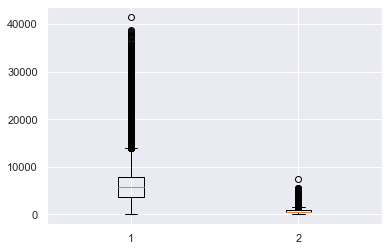

In [51]:
sns.set()
plt.boxplot(train_store[['Sales', 'Customers']])
plt.show()

In [53]:
#So handling the outliers using IQR
train_df = preprocessor.replace_outliers_iqr(train_store,['Sales', 'Customers'])

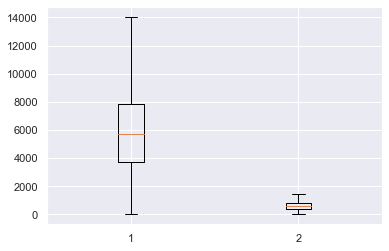

In [54]:
sns.set()
plt.boxplot(train_store[['Sales', 'Customers']])
plt.show()

In [55]:
train_store.drop('Customers',inplace = True, axis=1)

In [58]:
catagorical_columns = preprocessor.get_categorical_columns(train_store)
print(catagorical_columns)

['StateHoliday', 'StoreType', 'Assortment', 'PromoInterval']
